In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('datasest/UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df=df.drop(['ID','ZIP Code'],axis=1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [4]:
null_counts = df.isnull().sum()
print(null_counts)

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [5]:
summary_stats = df.describe(include='all')
print(summary_stats)

               Age   Experience       Income       Family        CCAvg  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     45.338400    20.104600    73.774200     2.396400     1.937938   
std      11.463166    11.467954    46.033729     1.147663     1.747659   
min      23.000000    -3.000000     8.000000     1.000000     0.000000   
25%      35.000000    10.000000    39.000000     1.000000     0.700000   
50%      45.000000    20.000000    64.000000     2.000000     1.500000   
75%      55.000000    30.000000    98.000000     3.000000     2.500000   
max      67.000000    43.000000   224.000000     4.000000    10.000000   

         Education     Mortgage  Personal Loan  Securities Account  \
count  5000.000000  5000.000000    5000.000000         5000.000000   
mean      1.881000    56.498800       0.096000            0.104400   
std       0.839869   101.713802       0.294621            0.305809   
min       1.000000     0.000000       0.000000       

In [6]:
age_counts = df['Age'].value_counts().reset_index()
age_counts.columns = ['age', 'count']
age_counts['age'].head()

0    35
1    43
2    52
3    54
4    58
Name: age, dtype: int64

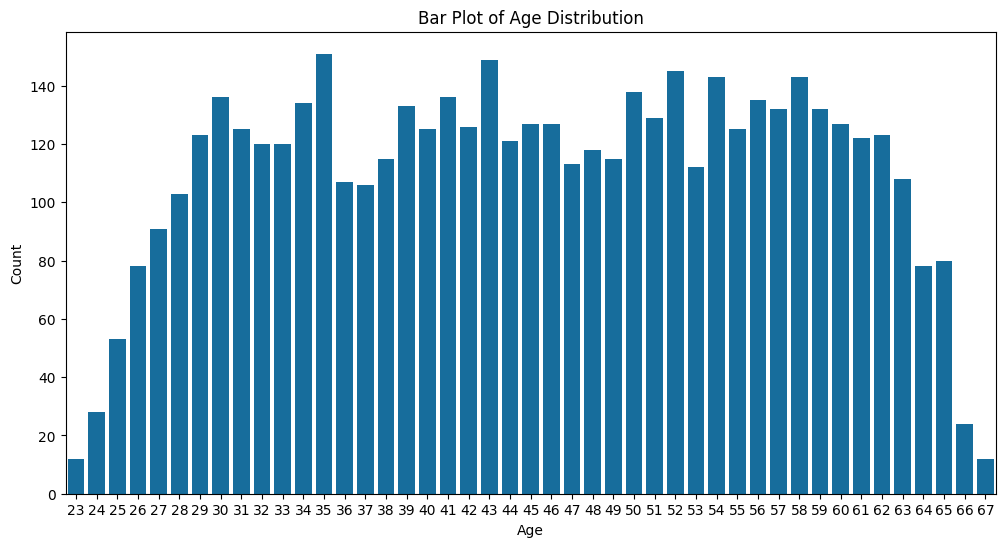

In [7]:
sns.set_palette("colorblind")
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='count', data=age_counts)


plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Bar Plot of Age Distribution')

plt.show()

In [8]:
personal_loan_counts = df['Personal Loan'].value_counts().reset_index()
personal_loan_counts.columns = ['personal loan', 'count']
personal_loan_counts['personal loan']

0    0
1    1
Name: personal loan, dtype: int64

In [9]:
replacement={0:'Not approved',1:'Approved'}
personal_loan_counts['personal loan'] = personal_loan_counts['personal loan'].replace(replacement)
     

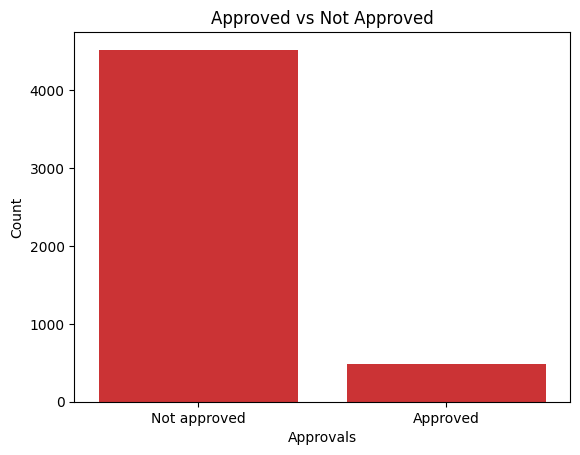

In [10]:
sns.set_palette("Set1")
sns.barplot(x='personal loan', y='count', data=personal_loan_counts)



plt.xlabel('Approvals')
plt.ylabel('Count')
plt.title('Approved vs Not Approved')

plt.show()


In [11]:
personal_loan_counts

,personal loan,count
0,Not approved,4520
1,Approved,480


In [12]:
df['income_per_person']=df['Income']/df['Family']

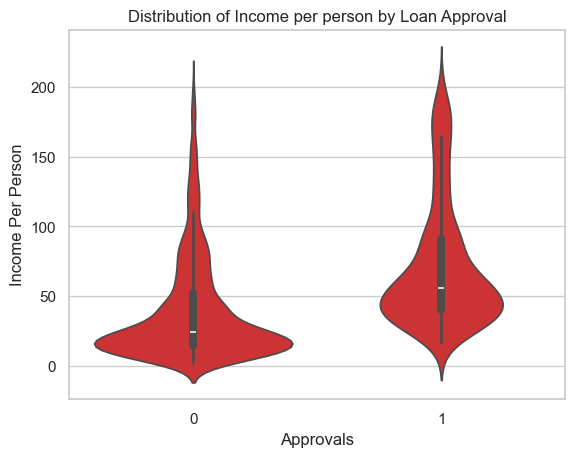

In [13]:
sns.set(style="whitegrid")
sns.set_palette("Set1")
sns.violinplot(x='Personal Loan', y='income_per_person', data=df)


plt.xlabel('Approvals')
plt.ylabel('Income Per Person')
plt.title('Distribution of Income per person by Loan Approval')


plt.show()


In [14]:
age_bins = [0, 35, 55, float("inf")]
age_labels = ['Young', 'Middle Aged', 'Senior Citizen']


df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)


df.head()
     

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,income_per_person,Age Group
0,25,1,49,4,1.6,1,0,0,1,0,0,0,12.250000,Young
1,45,19,34,3,1.5,1,0,0,1,0,0,0,11.333333,Middle Aged
2,39,15,11,1,1.0,1,0,0,0,0,0,0,11.000000,Middle Aged
3,35,9,100,1,2.7,2,0,0,0,0,0,0,100.000000,Young
4,35,8,45,4,1.0,2,0,0,0,0,0,1,11.250000,Young


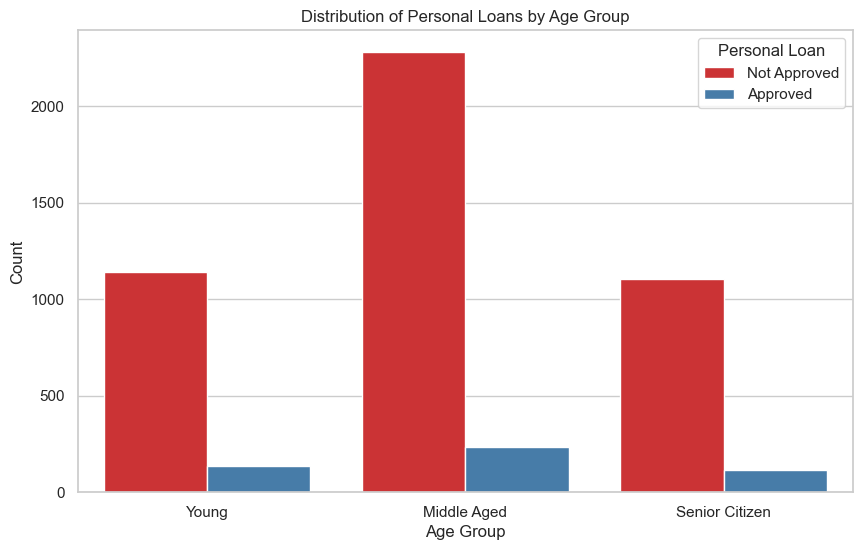

In [15]:
sns.set_palette("Set1")


plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='Personal Loan', data=df)


plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Personal Loans by Age Group')


plt.legend(title='Personal Loan', labels=['Not Approved', 'Approved'])
plt.show()

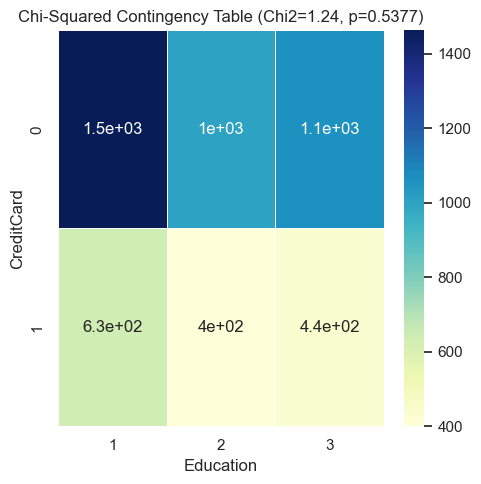

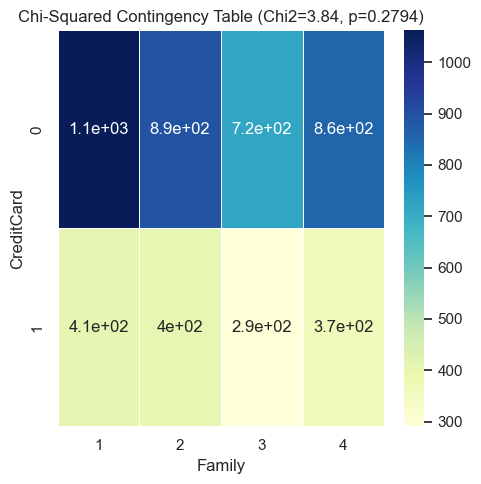

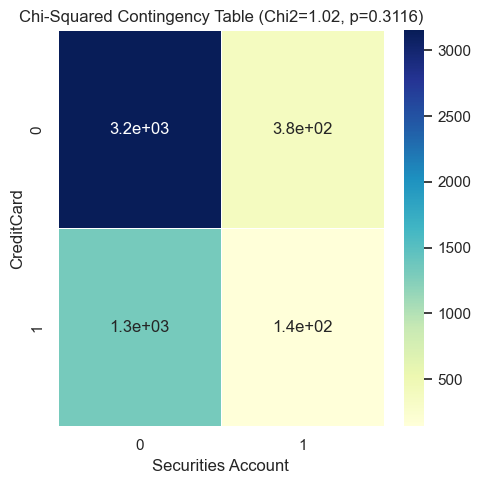

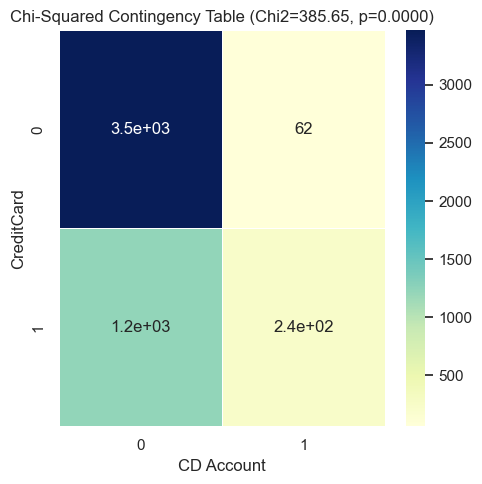

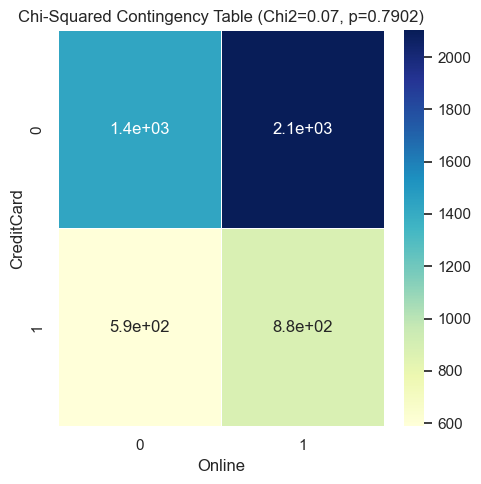

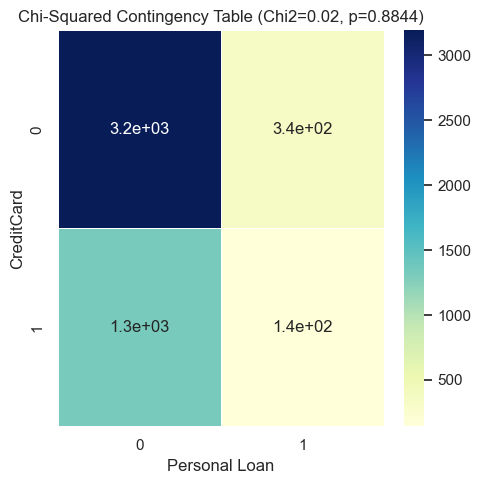

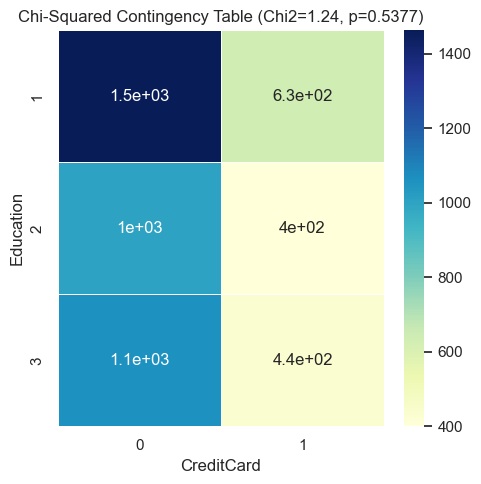

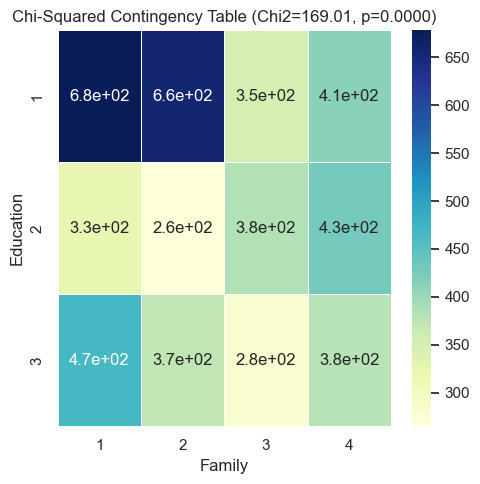

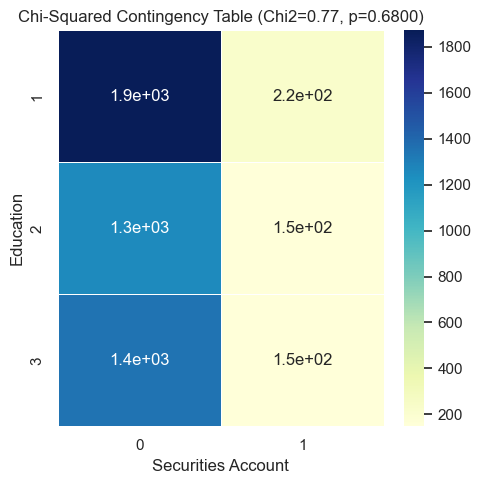

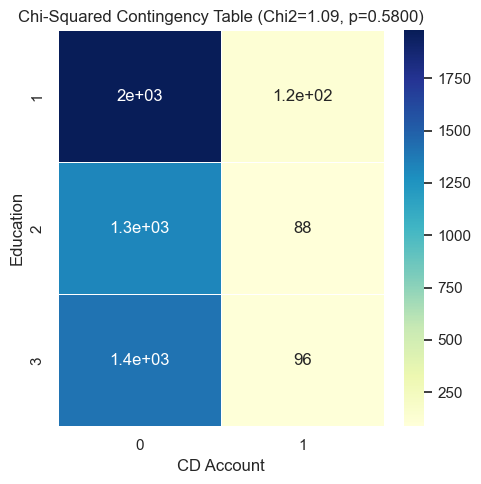

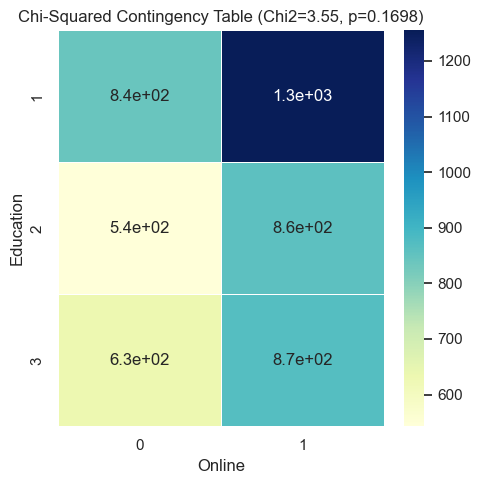

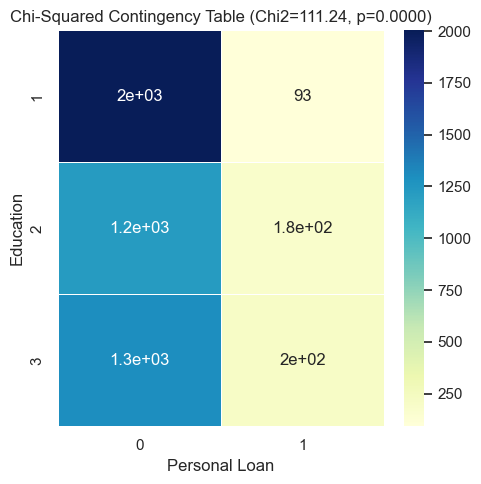

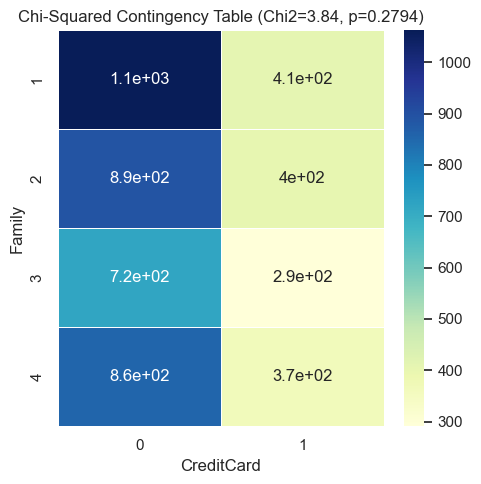

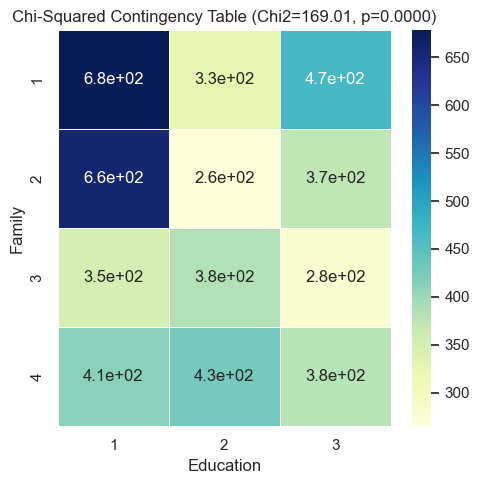

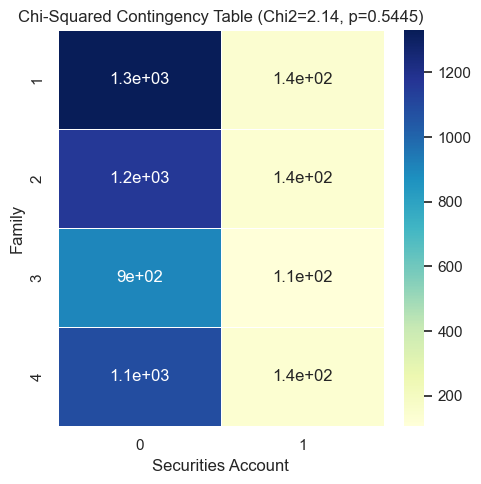

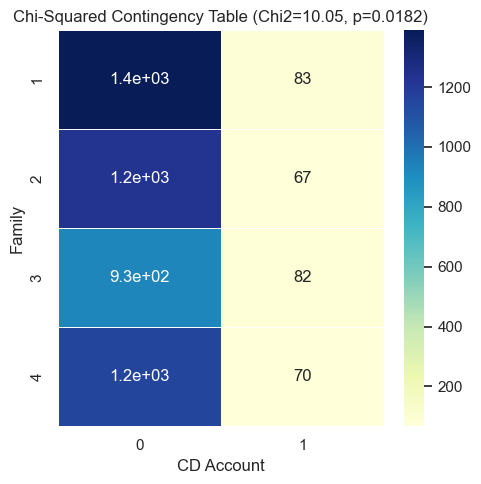

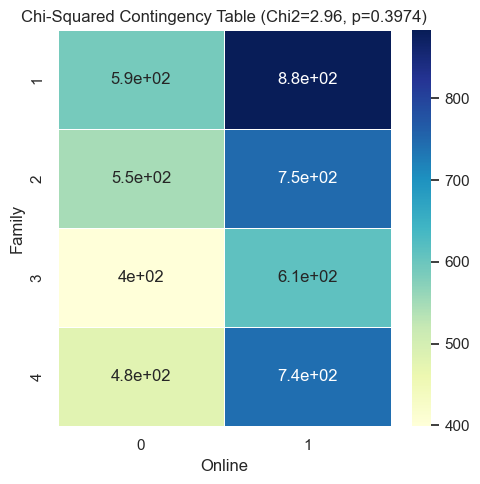

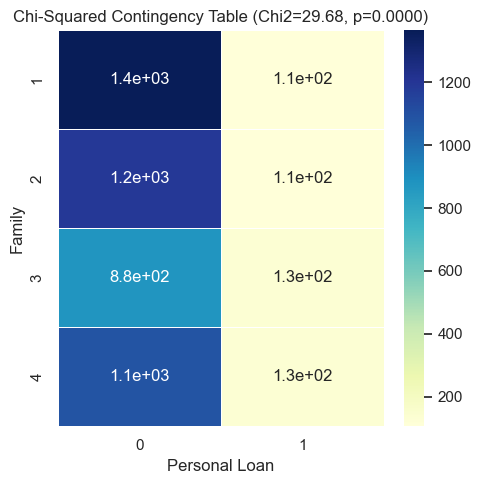

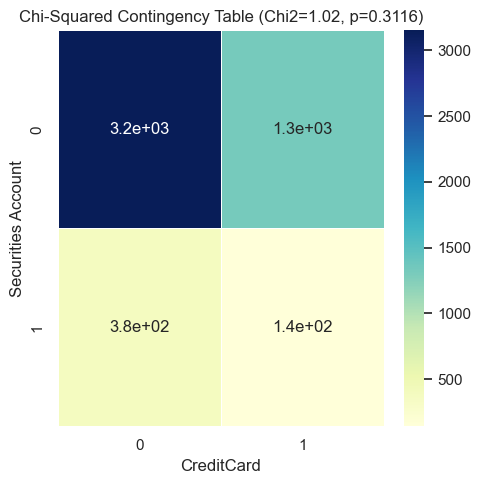

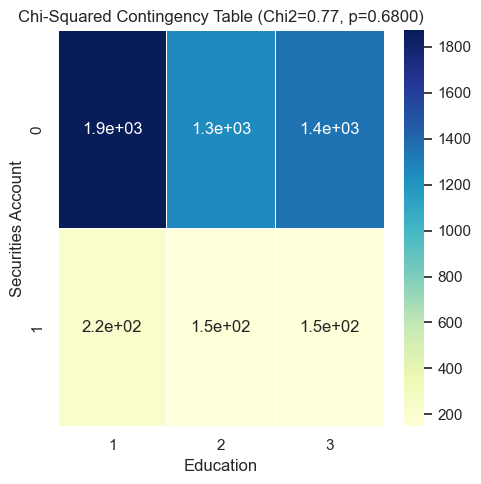

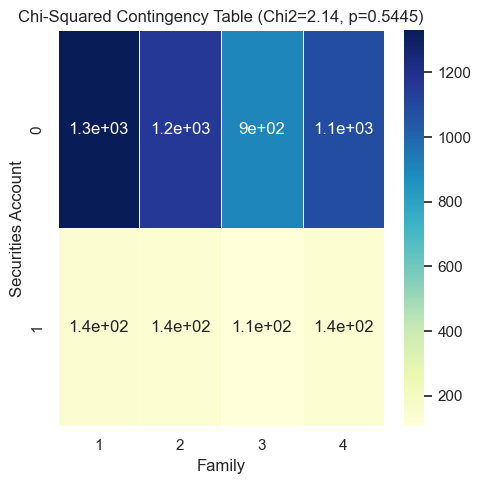

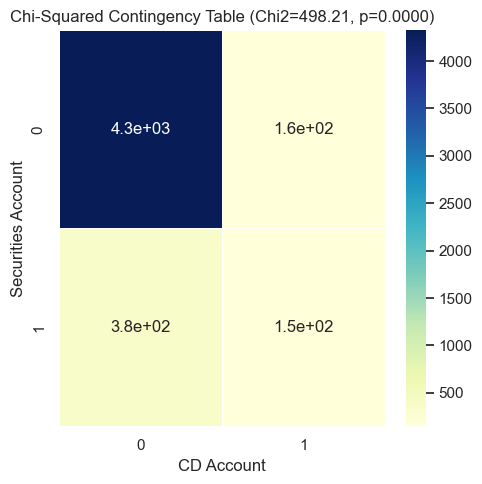

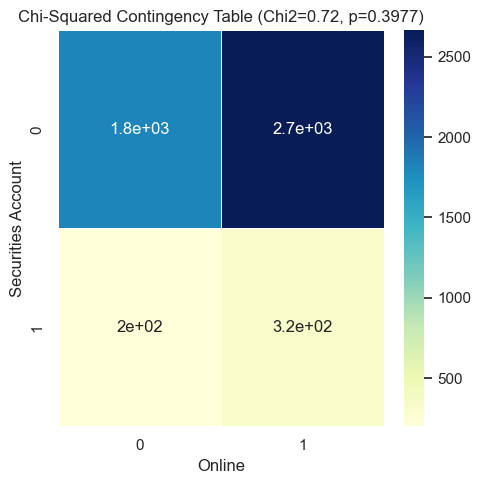

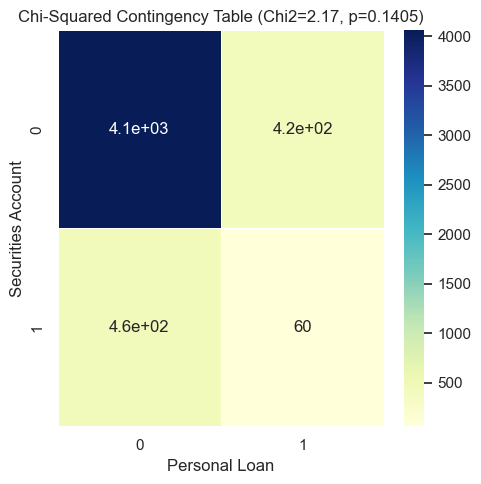

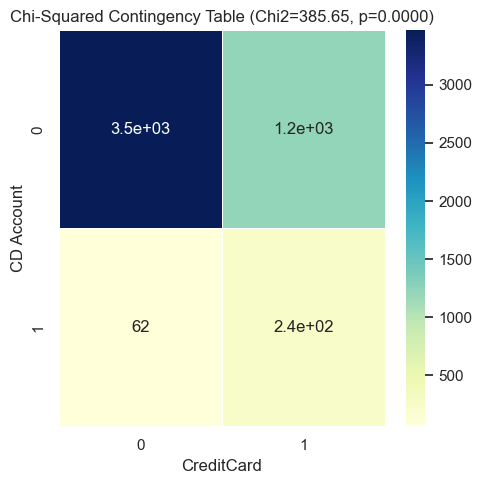

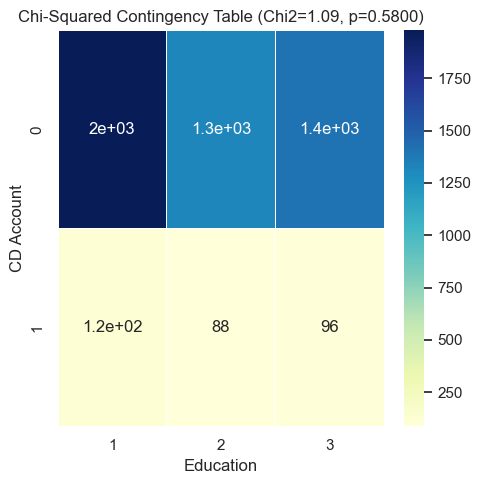

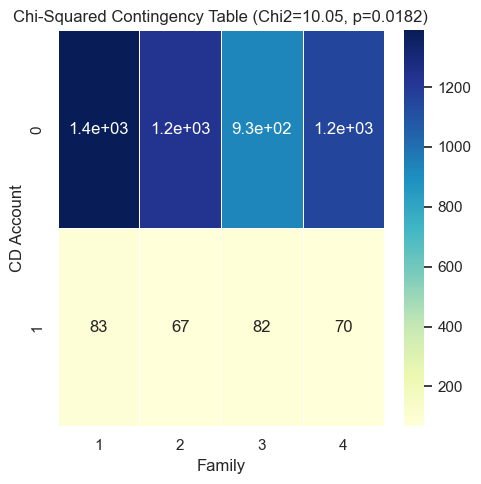

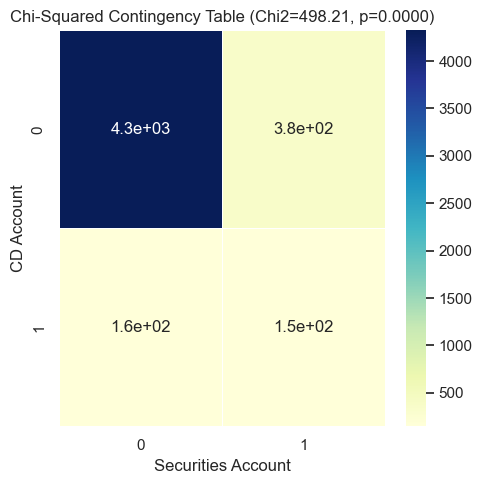

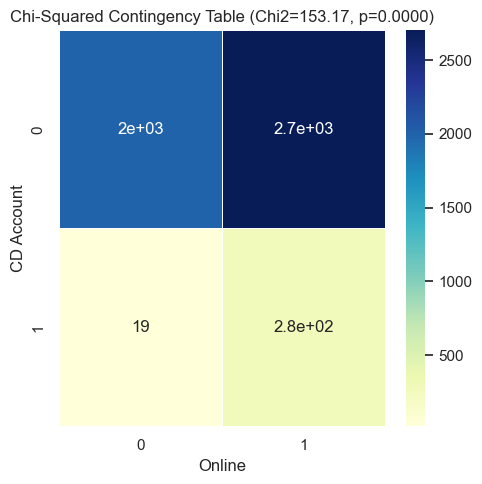

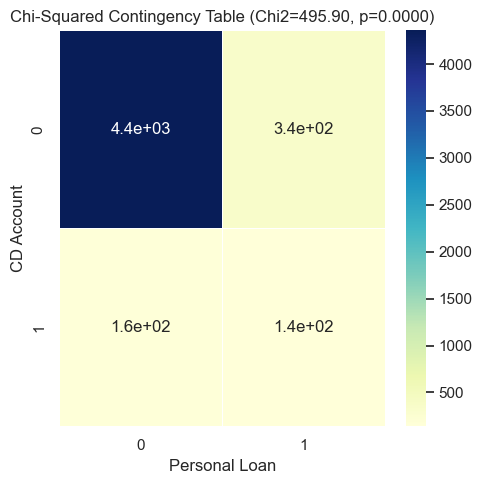

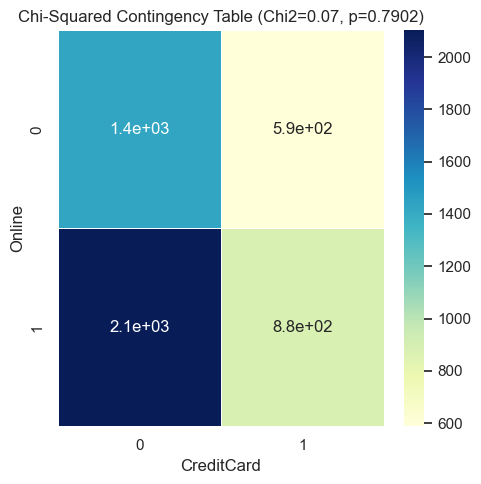

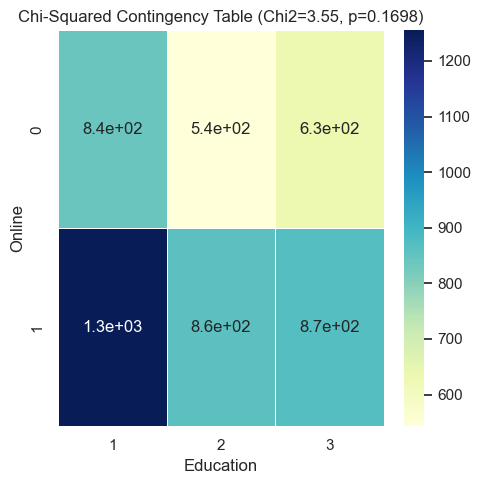

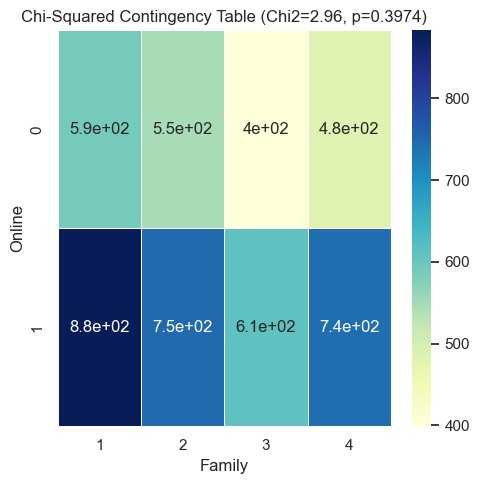

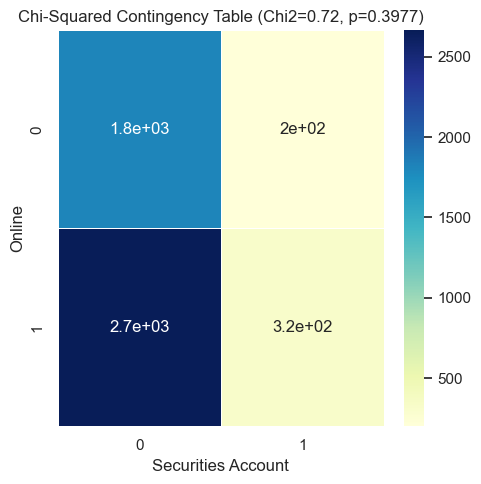

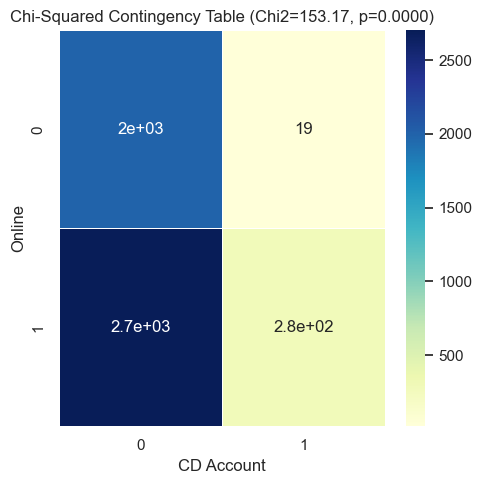

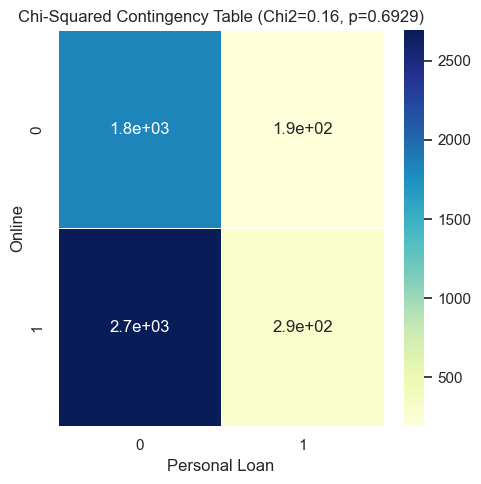

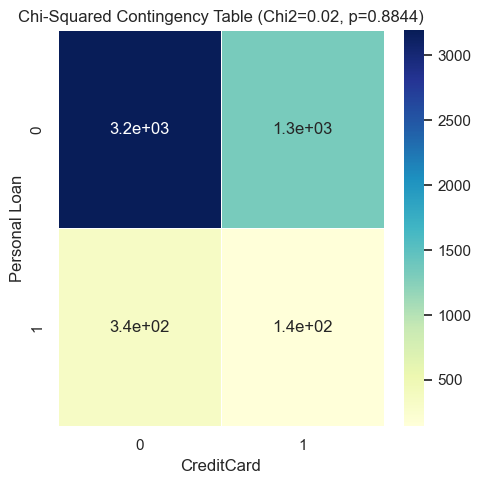

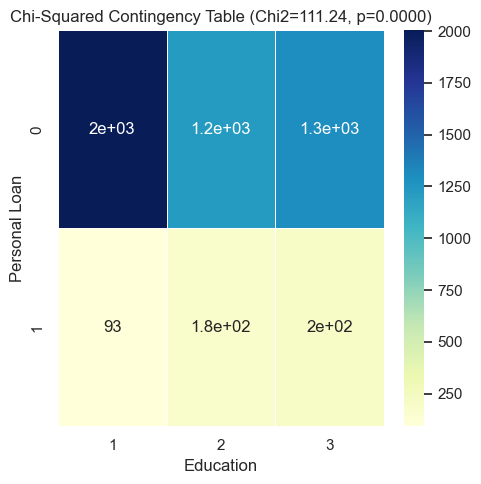

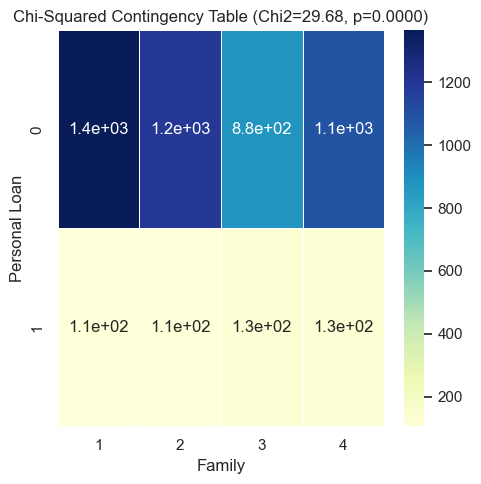

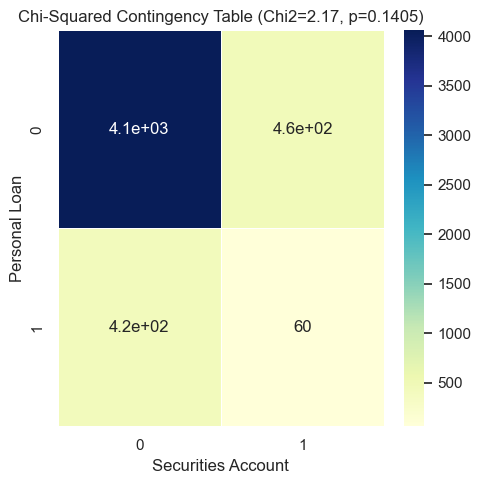

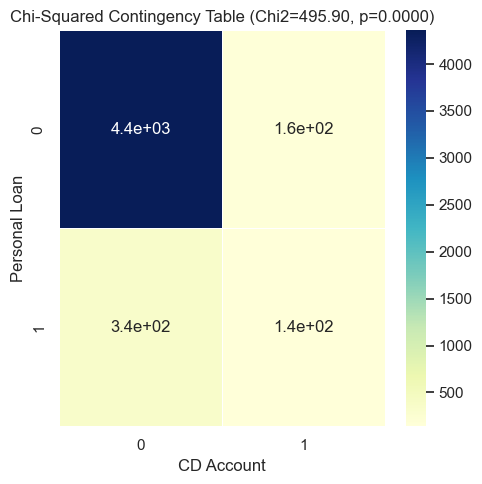

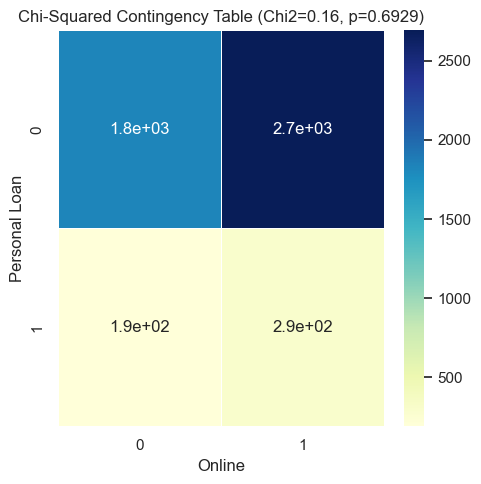

In [16]:
import scipy.stats
categorical_vars = ['CreditCard','Education', 'Family','Securities Account', 'CD Account', 'Online','Personal Loan']

# Calculate chi-square values and p-values for each comparison
for var1 in categorical_vars:
  for var2 in categorical_vars:
    if var1!=var2:
      contingency_table = pd.crosstab(df[var1], df[var2])
      chi2, p, _, _ = scipy.stats.chi2_contingency(contingency_table)


      plt.figure(figsize=(5, 5))
      sns.heatmap(data=contingency_table, annot=True, cmap='YlGnBu', linewidths=0.5)


      plt.xlabel(var2)
      plt.ylabel(var1)
      plt.title(f'Chi-Squared Contingency Table (Chi2={chi2:.2f}, p={p:.4f})')
      plt.tight_layout()

      plt.show()

C:\Users\SHAIK MOHAMMED YUSUF\AppData\Local\Temp\ipykernel_16980\2458467966.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_var, y=var, data=df, palette='Set1', ax=axes[i])
C:\Users\SHAIK MOHAMMED YUSUF\AppData\Local\Temp\ipykernel_16980\2458467966.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_var, y=var, data=df, palette='Set1', ax=axes[i])
C:\Users\SHAIK MOHAMMED YUSUF\AppData\Local\Temp\ipykernel_16980\2458467966.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_var, y=var, data=df,

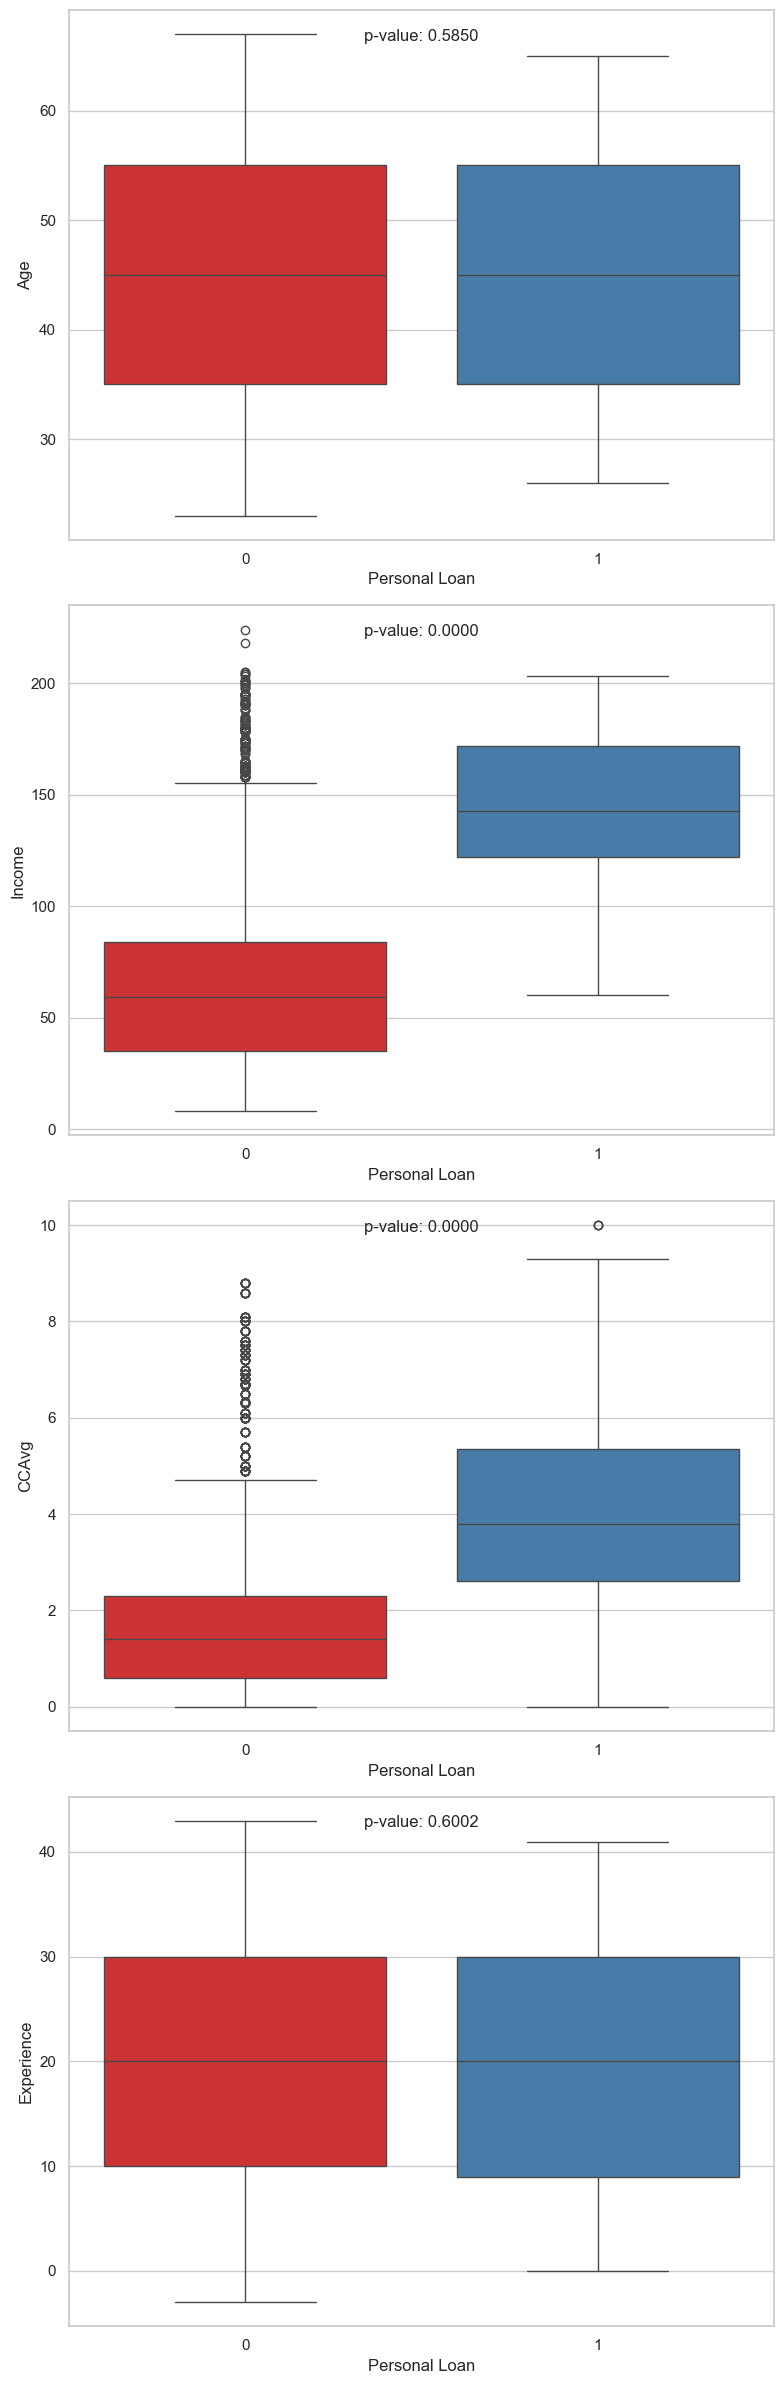

In [18]:
import scipy.stats as stats

# List of continuous variables
continuous_vars = ['Age', 'Income', 'CCAvg', 'Experience']

# Categorical variable
categorical_var = 'Personal Loan'

# Creating subplots
fig, axes = plt.subplots(nrows=len(continuous_vars), ncols=1, figsize=(8, 6 * len(continuous_vars)))

# Performing ANOVA and displaying p-values
for i, var in enumerate(continuous_vars):
    sns.boxplot(x=categorical_var, y=var, data=df, palette='Set1', ax=axes[i])

    # Performing ANOVA
    group_values = [df[var][df[categorical_var] == cat] for cat in df[categorical_var].unique()]
    f_statistic, p_value = stats.f_oneway(*group_values)

    # Adding p-value as text annotation
    axes[i].annotate(f'p-value: {p_value:.4f}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center', va='center')


    axes[i].set_xlabel(categorical_var)
    axes[i].set_ylabel(var)


plt.tight_layout()


plt.show()


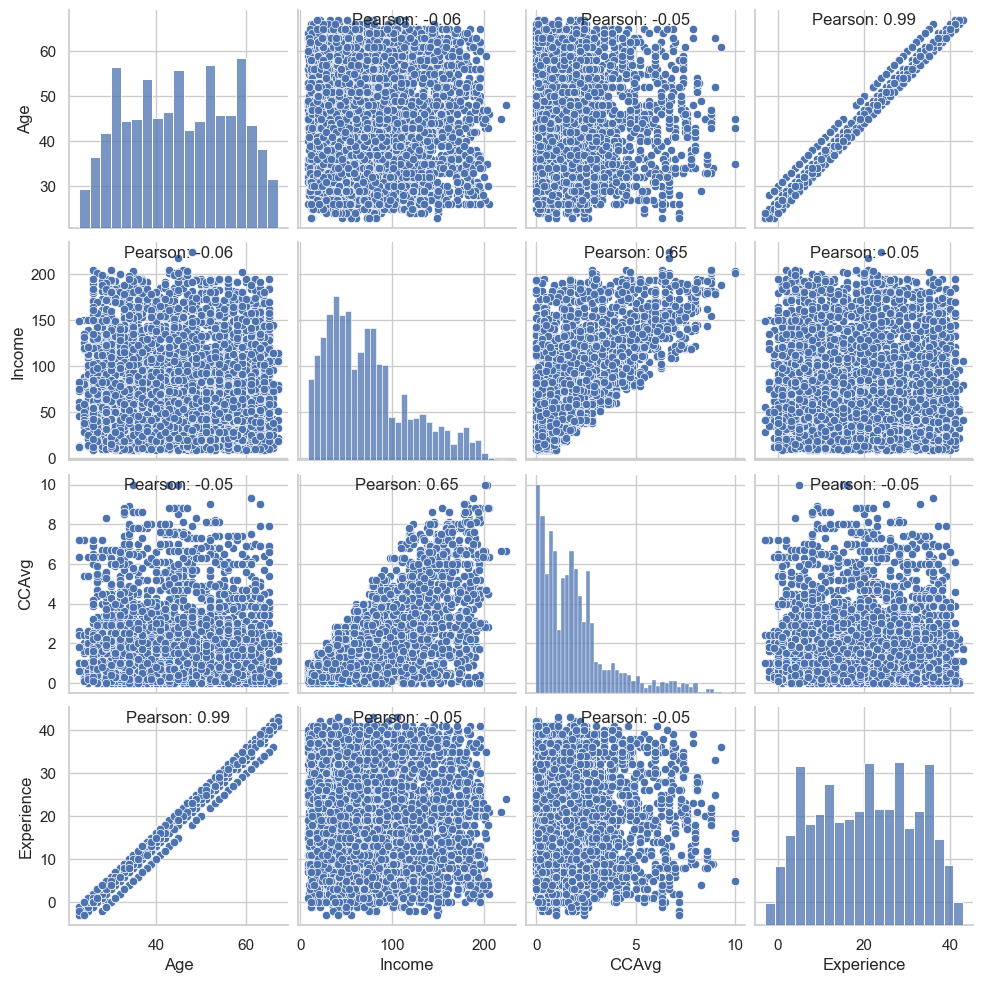

In [19]:
df_continuous=df[['Age','Income', 'CCAvg', 'Experience']]
sns.set_palette("deep")
correlation_matrix = df_continuous.corr()
pairplot = sns.pairplot(df_continuous)


n = len(df_continuous.columns)
for i, var1 in enumerate(df_continuous.columns):
    for j, var2 in enumerate(df_continuous.columns):
        ax = pairplot.axes[j, i]

        if i != j:
            corr_value = correlation_matrix.loc[var1, var2]
            text = f"Pearson: {corr_value:.2f}"
            ax.annotate(text, xy=(0.5, 0.95), xycoords='axes fraction', ha='center', va='center')


plt.show()

Accuracy: 0.9906666666666667
Precision: 0.9779411764705882
Recall: 0.9236111111111112
F1 Score: 0.95
ROC AUC Score: 0.9985122705670272

Confusion Matrix:
 [[1353    3]
 [  11  133]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.92      0.95       144

    accuracy                           0.99      1500
   macro avg       0.98      0.96      0.97      1500
weighted avg       0.99      0.99      0.99      1500



<Figure size 800x600 with 0 Axes>

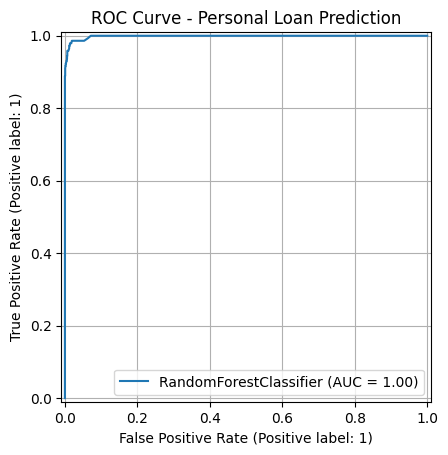

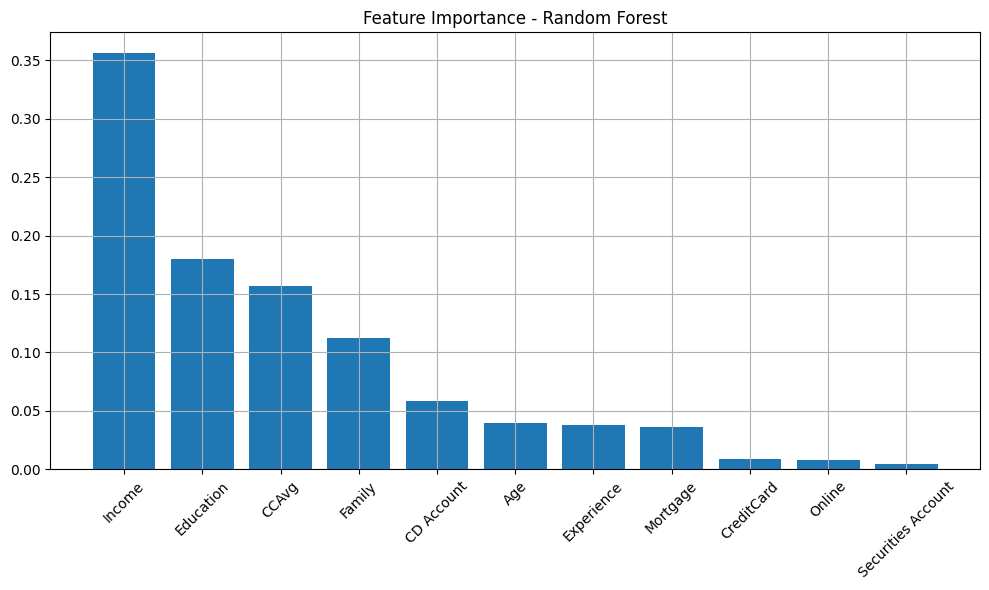

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    classification_report, RocCurveDisplay
)
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("datasest/UniversalBank.csv")

# Drop irrelevant columns
df = df.drop(columns=['ID', 'ZIP Code'])

# Define features and target
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("ROC Curve - Personal Loan Prediction")
plt.grid(True)
plt.show()

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()
